 # Graduate Rotational Internship Program by The Sparks Foundation

### Author: Fahad Munir

### Task 4
## Exploratoy Data Analysis-Terrorism

This task is part of the internship with The Sparks Foundation. In this task we have to analyze the Global Terrorism dataset in order to find out hotpots of terrorism.


In [6]:
# Importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install folium
import folium
from folium.plugins import MarkerCluster

In [7]:
import csv

with open("E:\\The Sparks Foundation\\Global_Terrorism\\globalterrorismdb_0718dist.csv", "rt", encoding='latin-1') as infile, open("repaired.csv", "wt",encoding='latin-1') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    conversion = set('_"/.$')
    for row in reader:
        newrow = [''.join('_' if c in conversion else c for c in entry) for entry in row]
        writer.writerow(newrow)

In [8]:
#Reading data
terr_data = pd.read_csv(r'E:\The Sparks Foundation\\repaired.csv',encoding='latin-1')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,70,76,79,90,92,94,96,101,107,112,114,115,117,118,119,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
terr_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
terr_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,specificity,vicinity,crit1,...,nhostkidus,ndays,ransom,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181685.000000,181691.000000,181691.000000,...,13517.000000,8124.000000,77381.000000,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,1.451452,0.068297,0.988530,...,-0.353999,-32.516371,-0.145811,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.995430,0.284553,0.106483,...,6.835645,121.209205,1.207861,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,-9.000000,0.000000,...,-99.000000,-99.000000,-9.000000,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,1.000000,0.000000,1.000000,...,0.000000,-99.000000,0.000000,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,1.000000,0.000000,1.000000,...,0.000000,-99.000000,0.000000,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,1.000000,0.000000,1.000000,...,0.000000,4.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,5.000000,1.000000,1.000000,...,86.000000,2454.000000,1.000000,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
terr_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
terr_data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [14]:
terr_data2 = terr_data.copy()

In [15]:
terr_data2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
terr_data2.dropna(axis=1, how='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,_Somalia: Al-Shabaab Militants Attack Army Che...,_Highlights: Somalia Daily Media Highlights 2 ...,_Highlights: Somalia Daily Media Highlights 1 ...,START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,_Putin's 'victory' in Syria has turned into a ...,_Two Russian soldiers killed at Hmeymim base i...,_Two Russian servicemen killed in Syria mortar...,START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"_Maguindanao clashes trap tribe members,_ Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"_Trader escapes grenade attack in Imphal,_ Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


## Renaming columns for easy understanding

In [18]:
terr_data2.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [21]:
# considering only the useful columns
terr_data2=terr_data2[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [23]:
# filling the full null value with zero

terr_data2['Wounded']=terr_data2['Wounded'].fillna(0).astype(int)
terr_data2['Killed']=terr_data2['Killed'].fillna(0).astype(int)

<ipython-input-23-9bee19910a0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terr_data2['Wounded']=terr_data2['Wounded'].fillna(0).astype(int)
<ipython-input-23-9bee19910a0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terr_data2['Killed']=terr_data2['Killed'].fillna(0).astype(int)


In [24]:
# New Column Casualities
terr_data2['Casualities'] = terr_data2['Killed'] + terr_data2['Wounded']

In [25]:
terr_data2.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18_456792,-69_951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19_371887,-99_086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15_478598,120_599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37_99749,23_762728,Bombing_Explosion,0,0,U_S_ Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33_580412,130_396361,Facility_Infrastructure Attack,0,0,U_S_ Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [26]:
terr_data2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            634
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities         0
dtype: int64

## Basic Data Analysis

In [28]:
!pip install wordcloud


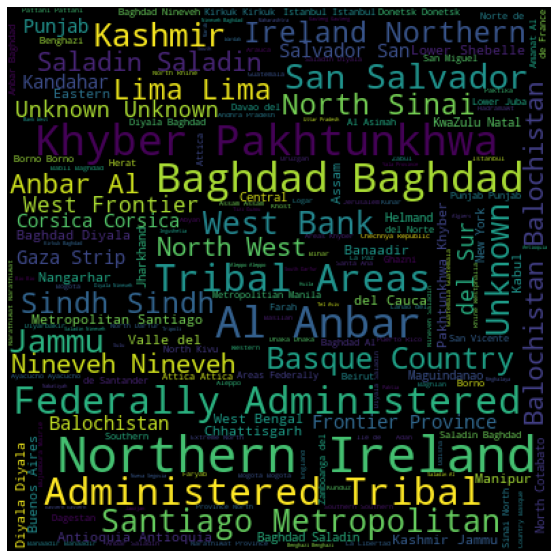

In [29]:
from wordcloud import WordCloud
from scipy import signal
cities = terr_data2.State.dropna(False)
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color='black',width=400, height=400).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wc)
plt.show()

## From the wordcloud we can see, Northern Ireland, Santiago Metropoliton, Baghdad, Kashmir, Khyber Pakhtunkhwa, Jammu, Tribal Areas are mostly affected by terrorism.